In [1]:
import os
import json
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# 设置字体
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman'] + mpl.rcParams['font.serif']

# 内嵌矢量图
%config InlineBackend.figure_format = 'svg'

In [11]:
cancer_map = {'melanoma':'Melanoma of skin', 'nomelanoma':'Non-melanoma skin cancer'}
plt.rcParams['xtick.labelsize'] = 13  # 设置x轴刻度字体大小
plt.rcParams['ytick.labelsize'] = 13  # 设置y轴刻度字体大小

def image_show(results, period, cancer):

    # 将数据转换为DataFrame
    df = pd.DataFrame.from_dict(results, orient='index')

    # 设置年龄范围作为索引
    ages = df.index.astype(int)

    # 设置大洲作为列
    continents = df.columns

    # 创建图形和轴
    fig, ax = plt.subplots(figsize=(12, 6.75))

    # 柱子的宽度和位置
    width = 0.15       # the width of the bars
    x = np.arange(len(ages))  # the label locations

    # 绘制柱状图
    for i, continent in enumerate(continents):
        ax.bar(x - width + (i * width), df[continent], width, label=continent)

    # 设置图表标题和标签
    ax.set_title(f'{period}-year({cancer_map[cancer]})', fontsize=18)
    ax.set_xlabel('Age(Years)', fontsize=15)
    ax.set_ylabel('Prevalence cases', fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(ages)
    # 添加图例
    ax.legend(
        loc='upper center', 
        bbox_to_anchor=(0.5, -0.10),
        # fancybox=True,
        frameon=False,
        shadow=False, 
        ncol=5,
        fontsize=13
    )

    # 保存为svg格式
    plt.savefig(f'data/output/svg/prevalence_{cancer}_{period}_year.svg', format='svg', bbox_inches='tight')

    # 显示图表
    plt.show()

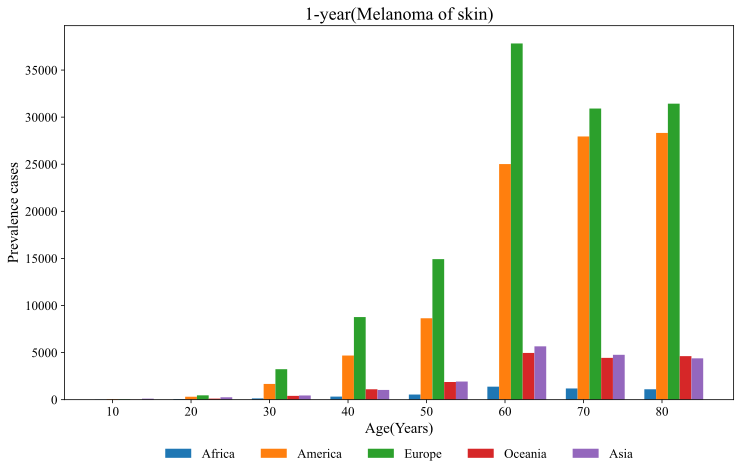

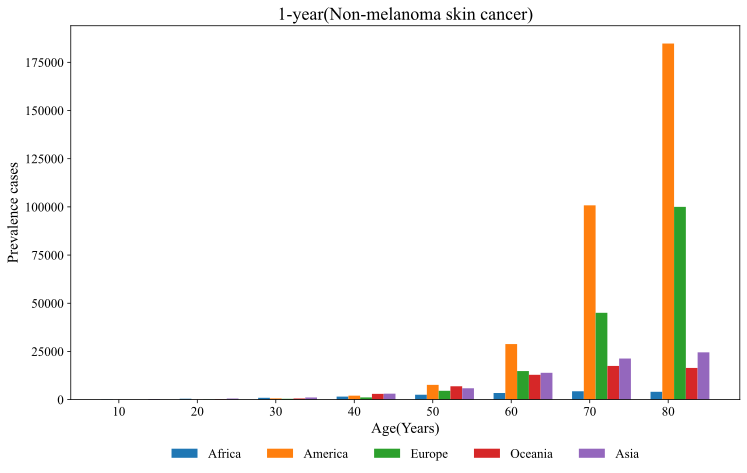

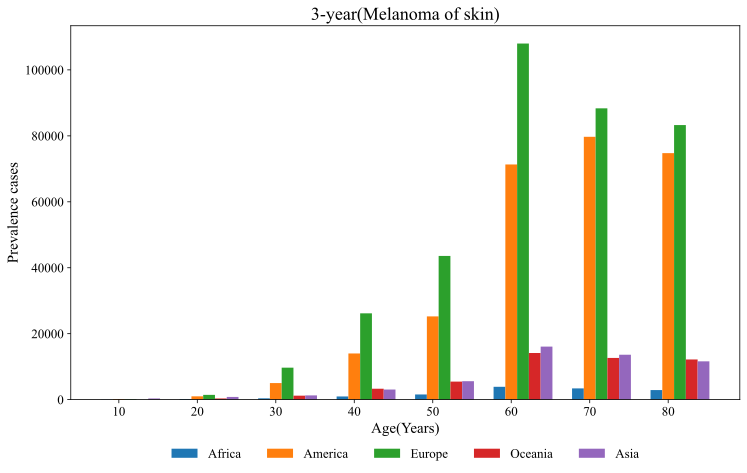

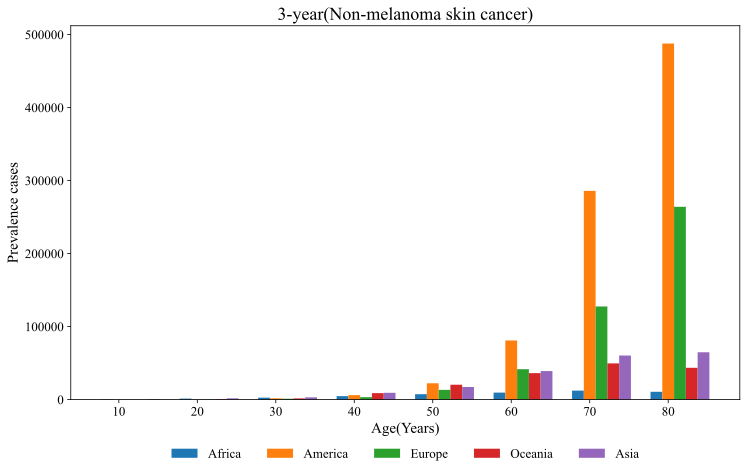

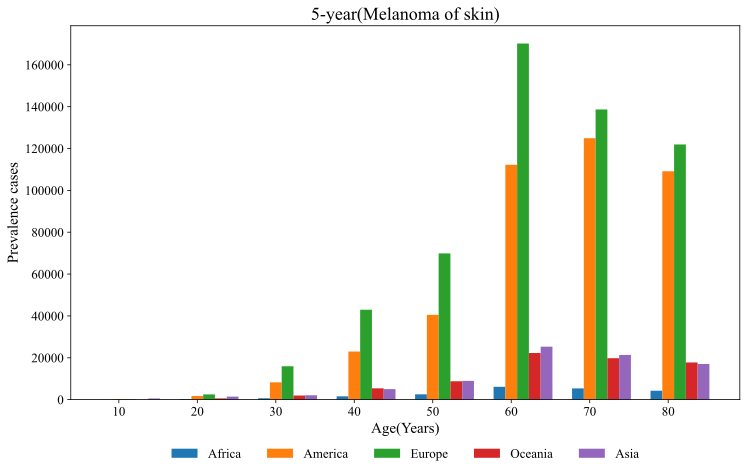

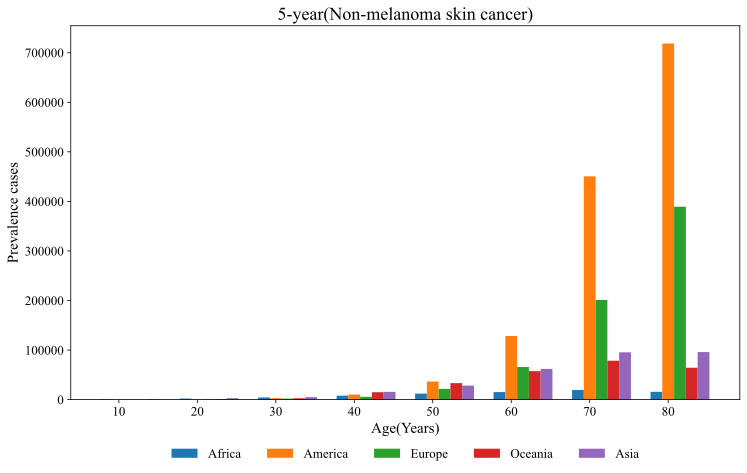

In [12]:
period_sort = [1, 3, 5]

region_sort = [
    "Africa",
    "Europe",
    "Asia",
    "Oceania",
    "America"
]

america_sort = ["Northern America", "Latin America and the Caribbean"]

age_sort = [10, 20, 30, 40, 50, 60, 70, 80]

cancer_sort = ['melanoma', 'nomelanoma']

for period in period_sort:
    for cancer in cancer_sort:
        results = {}
        data_dir = f'data/input/'

        file_pattern = f"prevalence_{cancer}"

        for filename in os.listdir(data_dir):
            if not filename.startswith(file_pattern):
                continue

            year = filename.split('_')[2].split('.')[0]

            # 读取json文件
            filepath = os.path.join(data_dir, filename)
            with open(filepath, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            if year not in results:
                results[year] = {}
            
            for item in data:
                if item['prev_time'] != period:
                    continue
                if item['label'] in america_sort:
                    if item['label'] not in results[year]:
                        results[year]['America'] = 0
                    results[year]['America'] += item['total']
                    continue
                results[year][item['label']] = item['total']
            
            # 按年份排序
            years = list(results.keys())
            years.sort(key=int)

            results = {year: results[year] for year in years}

            with open(f'data/output/json/prevalence_{cancer}_{period}_year.json', 'w', encoding='utf-8') as f:
                json.dump(results, f, ensure_ascii=False, indent=4)
            
        image_show(results, period, cancer)